In [33]:
!pip install Wordcloud
!pip install Sastrawi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.neural_network import MLPClassifier
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud, STOPWORDS
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras  # Assuming you're using TensorFlow 2.x


In [ ]:
data = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Diana/Diana/AnalisisSentimenPilpres-main/HasilLabelingData_lexicon.csv', lineterminator='\n')
data.head(10)

,full_text,cleasing,case_folding,tokenize,Filtering/stopword removal,stemming_data,Sentiment
0,Presiden terpilih Pak @Prabowo kembali menegas...,Presiden terpilih Pak Prabowo kembali menegask...,presiden terpilih pak prabowo kembali menegask...,"['presiden', 'terpilih', 'pak', 'prabowo', 'ke...","['presiden', 'terpilih', 'prabowo', 'sikap', '...",presiden terpilih prabowo sikap komitmennya me...,NaN
1,Pesan menyentuh dari Presiden Terpilih Prabowo...,Pesan menyentuh dari Presiden Terpilih Prabowo...,pesan menyentuh dari presiden terpilih prabowo...,"['pesan', 'menyentuh', 'dari', 'presiden', 'te...","['pesan', 'menyentuh', 'presiden', 'terpilih',...",pesan menyentuh presiden terpilih prabowo subi...,Positive
2,Presiden terpilih Prabowo Subianto menyatakan ...,Presiden terpilih Prabowo Subianto menyatakan ...,presiden terpilih prabowo subianto menyatakan ...,"['presiden', 'terpilih', 'prabowo', 'subianto'...","['presiden', 'terpilih', 'prabowo', 'subianto'...",presiden terpilih prabowo subianto menuntaskan...,Positive
3,Situasi politik tampaknya bakal berubah di tah...,Situasi politik tampaknya bakal berubah di tah...,situasi politik tampaknya bakal berubah di tah...,"['situasi', 'politik', 'tampaknya', 'bakal', '...","['situasi', 'politik', 'berubah', 'pemicunya',...",situasi politik berubah pemicunya prabowo subi...,Positive
4,Semua elemen masyarakat dukung Hasil Pemilu 20...,Semua elemen masyarakat dukung Hasil Pemilu P...,semua elemen masyarakat dukung hasil pemilu p...,"['semua', 'elemen', 'masyarakat', 'dukung', 'h...","['elemen', 'masyarakat', 'dukung', 'hasil', 'p...",elemen masyarakat dukung hasil pemilu prabowog...,Positive
5,Semua elemen masyarakat dukung Hasil Pemilu 20...,Semua elemen masyarakat dukung Hasil Pemilu P...,semua elemen masyarakat dukung hasil pemilu p...,"['semua', 'elemen', 'masyarakat', 'dukung', 'h...","['elemen', 'masyarakat', 'dukung', 'hasil', 'p...",elemen masyarakat dukung hasil pemilu prabowog...,Positive
6,Presiden Terpilih Prabowo Subianto menghadiri ...,Presiden Terpilih Prabowo Subianto menghadiri ...,presiden terpilih prabowo subianto menghadiri ...,"['presiden', 'terpilih', 'prabowo', 'subianto'...","['presiden', 'terpilih', 'prabowo', 'subianto'...",presiden terpilih prabowo subianto menghadiri ...,Positive
7,Jakarta (ANTARA) - Sekretaris Jenderal Partai ...,Jakarta ANTARA Sekretaris Jenderal Partai Ger...,jakarta antara sekretaris jenderal partai ger...,"['jakarta', 'antara', 'sekretaris', 'jenderal'...","['jakarta', 'sekretaris', 'jenderal', 'partai'...",jakarta sekretaris jenderal partai gerindra ah...,Positive
8,Media asing itu menyoroti besarnya perolehan s...,Media asing itu menyoroti besarnya perolehan s...,media asing itu menyoroti besarnya perolehan s...,"['media', 'asing', 'itu', 'menyoroti', 'besarn...","['media', 'asing', 'menyoroti', 'besarnya', 'p...",media asing menyoroti besarnya perolehan suara...,Positive
9,Presiden terpilih periode 2024-2029 Prabowo Su...,Presiden terpilih periode Prabowo Subianto me...,presiden terpilih periode prabowo subianto me...,"['presiden', 'terpilih', 'periode', 'prabowo',...","['presiden', 'terpilih', 'periode', 'prabowo',...",presiden terpilih periode prabowo subianto fak...,Positive


In [ ]:
# Seleksi data Menghapus beberapa kolom dari DataFrame
columns_to_drop = ['case_folding', 'tokenize','Filtering/stopword removal']
data = data.drop(columns=columns_to_drop)
data.head()


,full_text,cleasing,stemming_data,Sentiment
0,Presiden terpilih Pak @Prabowo kembali menegas...,Presiden terpilih Pak Prabowo kembali menegask...,presiden terpilih prabowo sikap komitmennya me...,NaN
1,Pesan menyentuh dari Presiden Terpilih Prabowo...,Pesan menyentuh dari Presiden Terpilih Prabowo...,pesan menyentuh presiden terpilih prabowo subi...,Positive
2,Presiden terpilih Prabowo Subianto menyatakan ...,Presiden terpilih Prabowo Subianto menyatakan ...,presiden terpilih prabowo subianto menuntaskan...,Positive
3,Situasi politik tampaknya bakal berubah di tah...,Situasi politik tampaknya bakal berubah di tah...,situasi politik berubah pemicunya prabowo subi...,Positive
4,Semua elemen masyarakat dukung Hasil Pemilu 20...,Semua elemen masyarakat dukung Hasil Pemilu P...,elemen masyarakat dukung hasil pemilu prabowog...,Positive


In [ ]:
# Menghapus baris yang mengandung NaN
data = data.dropna()
data.head()

,full_text,cleasing,stemming_data,Sentiment
1,Pesan menyentuh dari Presiden Terpilih Prabowo...,Pesan menyentuh dari Presiden Terpilih Prabowo...,pesan menyentuh presiden terpilih prabowo subi...,Positive
2,Presiden terpilih Prabowo Subianto menyatakan ...,Presiden terpilih Prabowo Subianto menyatakan ...,presiden terpilih prabowo subianto menuntaskan...,Positive
3,Situasi politik tampaknya bakal berubah di tah...,Situasi politik tampaknya bakal berubah di tah...,situasi politik berubah pemicunya prabowo subi...,Positive
4,Semua elemen masyarakat dukung Hasil Pemilu 20...,Semua elemen masyarakat dukung Hasil Pemilu P...,elemen masyarakat dukung hasil pemilu prabowog...,Positive
5,Semua elemen masyarakat dukung Hasil Pemilu 20...,Semua elemen masyarakat dukung Hasil Pemilu P...,elemen masyarakat dukung hasil pemilu prabowog...,Positive


In [ ]:
data.dtypes

full_text        object
cleasing         object
stemming_data    object
Sentiment        object
dtype: object

In [ ]:
data = data.astype(str)

In [ ]:
data.dtypes

full_text        object
cleasing         object
stemming_data    object
Sentiment        object
dtype: object

In [ ]:
data.shape

(1365, 4)

In [ ]:
data = data.replace({'Positive' :1, 'Negative' : 0})
data.head()

,full_text,cleasing,stemming_data,Sentiment
1,Pesan menyentuh dari Presiden Terpilih Prabowo...,Pesan menyentuh dari Presiden Terpilih Prabowo...,pesan menyentuh presiden terpilih prabowo subi...,1
2,Presiden terpilih Prabowo Subianto menyatakan ...,Presiden terpilih Prabowo Subianto menyatakan ...,presiden terpilih prabowo subianto menuntaskan...,1
3,Situasi politik tampaknya bakal berubah di tah...,Situasi politik tampaknya bakal berubah di tah...,situasi politik berubah pemicunya prabowo subi...,1
4,Semua elemen masyarakat dukung Hasil Pemilu 20...,Semua elemen masyarakat dukung Hasil Pemilu P...,elemen masyarakat dukung hasil pemilu prabowog...,1
5,Semua elemen masyarakat dukung Hasil Pemilu 20...,Semua elemen masyarakat dukung Hasil Pemilu P...,elemen masyarakat dukung hasil pemilu prabowog...,1


In [ ]:
data_negatif = data[data['Sentiment'] == 0 ]
data_positif = data[data['Sentiment'] == 1]


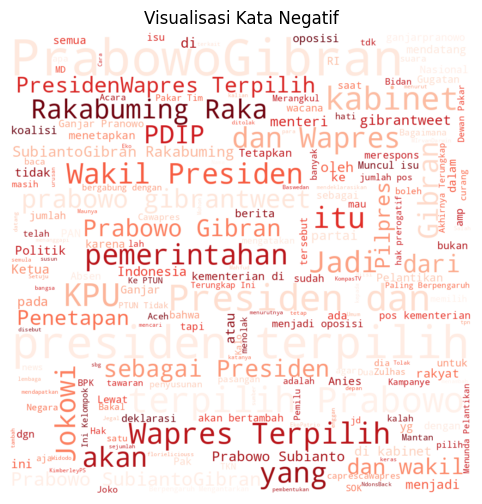

In [ ]:
all_text_s0 =' '.join(word for word in data_negatif['cleasing'])
wordcloud = WordCloud (colormap = 'Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate (all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

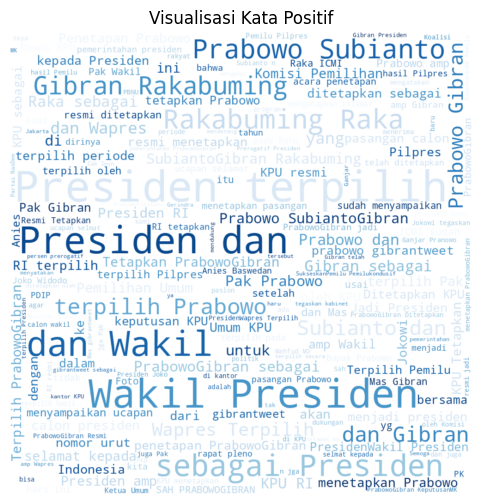

In [ ]:
all_text_s0 =' '.join(word for word in data_positif['cleasing'])
wordcloud = WordCloud (colormap = 'Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate (all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
data['Sentiment'].value_counts()

Sentiment
1    1290
0      75
Name: count, dtype: int64

In [ ]:
data.head()

,full_text,cleasing,stemming_data,Sentiment
1,Pesan menyentuh dari Presiden Terpilih Prabowo...,Pesan menyentuh dari Presiden Terpilih Prabowo...,pesan menyentuh presiden terpilih prabowo subi...,1
2,Presiden terpilih Prabowo Subianto menyatakan ...,Presiden terpilih Prabowo Subianto menyatakan ...,presiden terpilih prabowo subianto menuntaskan...,1
3,Situasi politik tampaknya bakal berubah di tah...,Situasi politik tampaknya bakal berubah di tah...,situasi politik berubah pemicunya prabowo subi...,1
4,Semua elemen masyarakat dukung Hasil Pemilu 20...,Semua elemen masyarakat dukung Hasil Pemilu P...,elemen masyarakat dukung hasil pemilu prabowog...,1
5,Semua elemen masyarakat dukung Hasil Pemilu 20...,Semua elemen masyarakat dukung Hasil Pemilu P...,elemen masyarakat dukung hasil pemilu prabowog...,1


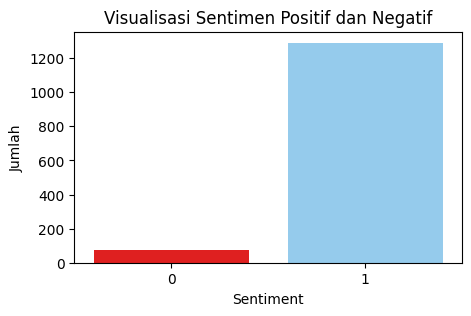

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data=data, x='Sentiment', hue='Sentiment', palette={0: "red", 1: "lightskyblue"}, legend=False)
plt.title('Visualisasi Sentimen Positif dan Negatif')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah')
plt.show()


##Pembagian Data

In [ ]:
# Pra-pemrosesan data dan pembagian data latih dan data uji
X = data['stemming_data']
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Hitung jumlah data dalam setiap kategori (latih dan uji)
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

In [ ]:
# Labels untuk sumbu x (kategori)
categories = train_counts.index

In [ ]:
# Jumlah data latih dan data uji
train_data = train_counts.values
test_data = test_counts.values

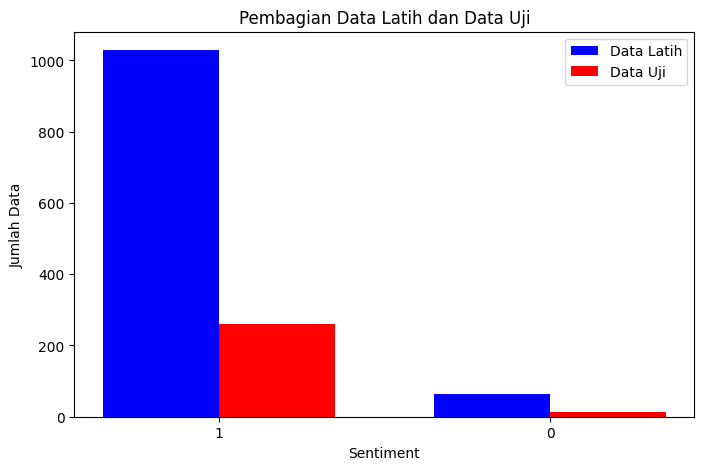

In [ ]:
# Lebar batang dalam diagram
bar_width = 0.35

# Indeks untuk sumbu x
indices = range(len(categories))

# Buat plot diagram batang untuk data latih (biru)
plt.figure(figsize=(8, 5))
plt.bar(indices, train_data, bar_width, label='Data Latih', color='blue')

# Buat plot diagram batang untuk data uji (merah)
plt.bar([i + bar_width for i in indices], test_data, bar_width, label='Data Uji', color='red')

# Atur label sumbu x dan label
plt.xlabel('Sentiment')
plt.ylabel('Jumlah Data')
plt.title('Pembagian Data Latih dan Data Uji')
plt.xticks([i + bar_width / 2 for i in indices], categories)
plt.legend()

# Tampilkan diagram batang
plt.show()
# 1 menunjukan sentiment positif dan 0 sentiment negatif

In [38]:
# Muat data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [39]:
# Definisikan model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [40]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [41]:
# Latih model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 2.7629 - accuracy: 0.8558
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3917 - accuracy: 0.9061
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2867 - accuracy: 0.9280
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2470 - accuracy: 0.9361
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2331 - accuracy: 0.9428


In [42]:
# Evaluasi model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Akurasi pengujian:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.2816 - accuracy: 0.9371
Akurasi pengujian: 0.9370999932289124
